In [1]:
from tkinter import * 
import tkinter as tk
from PIL import Image, ImageGrab, ImageOps
import numpy as np
import joblib
# import pickle

In [2]:
classifier = joblib.load('knn_model.gzip')

# OR

# classifier = joblib.load('svc_mnist_60k.gz')

# OR

# classifier = pickle.load(open('finalized_model.sav', 'rb'))

D:\Python\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
class GUI(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.canvas_width = 200
        self.canvas_height = 200
        self.bg_color = "White"
        self.paint_color = "black"
        self.radius = 5
        self.init_canvas()
        
    def init_canvas(self):
        self.canvas = Canvas(self, width=self.canvas_width, height=self.canvas_width, bg = self.bg_color, cursor="cross")
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        self.button_predict = tk.Button(self, text = "Predict", command = self.predict)
        self.label_digit = tk.Label(self, text="", font=("Helvetica"))
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.button_clear.grid(row=1, column=0, pady=2)
        self.button_predict.grid(row=1, column=1, pady=2)
        self.label_digit.grid(row=0, column=1, padx=2, pady=2)
        self.canvas.bind("<B1-Motion>", self.paint)

    def paint(self, event):
        x1, y1 = (event.x - self.radius), (event.y - self.radius)
        x2, y2 = (event.x + self.radius), (event.y + self.radius)
        self.canvas.create_oval(x1, y1, x2, y2, fill=self.paint_color, outline=self.paint_color)

    def clear_all(self):
        self.canvas.delete("all")
    
    def preprocess(self):
        fileName = 'canvas_paint'
        
        # Find Canvas Coordinates - I tweaked a little bit as a workaround
        x = self.canvas.winfo_x() + self.winfo_x() + 10
        y = self.canvas.winfo_y() + self.winfo_y() + 45
        x1 = x + self.canvas_width + 40
        y1 = y + self.canvas_height + 100
        
        # Screenshot and Save Image in Canvas
        img = ImageGrab.grab().crop((x,y,x1,y1))
        img.save(fileName + ".jpg")
        
        # Invert Image
        img = ImageOps.invert(img)
        img.save(fileName + "_negative" + ".jpg")
        
        # Resize and convert it into greyscale
        img = img.resize((28,28))
        img = img.convert('L')
        img.save(fileName + "_28x28" + ".jpg")
        
        # Convert it into Numpy array
        img = np.array(img)
        img = img.reshape(28*28)
        print("Pre Processing complete")
        return img
    
    def predict(self):
        img = self.preprocess()
        digit = classifier.predict([img])
        self.label_digit.configure(text=str(digit))

        
app = GUI()
mainloop()

Pre Processing complete
Pre Processing complete
Pre Processing complete
Pre Processing complete
Pre Processing complete
Pre Processing complete
Pre Processing complete
Pre Processing complete
Pre Processing complete
Pre Processing complete
Pre Processing complete
Pre Processing complete


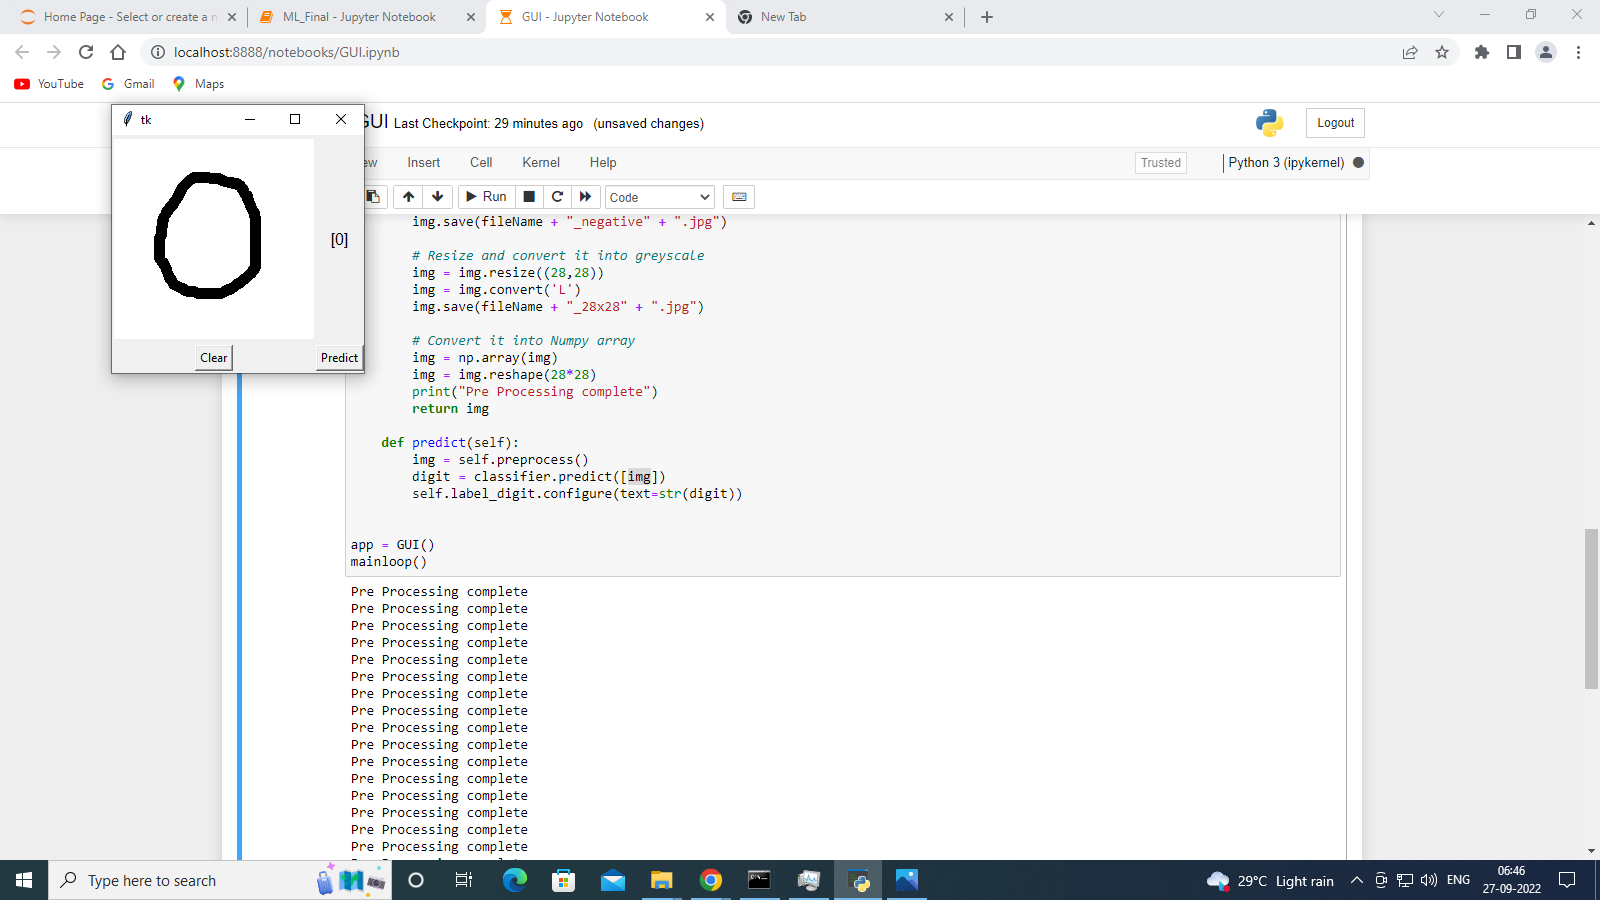

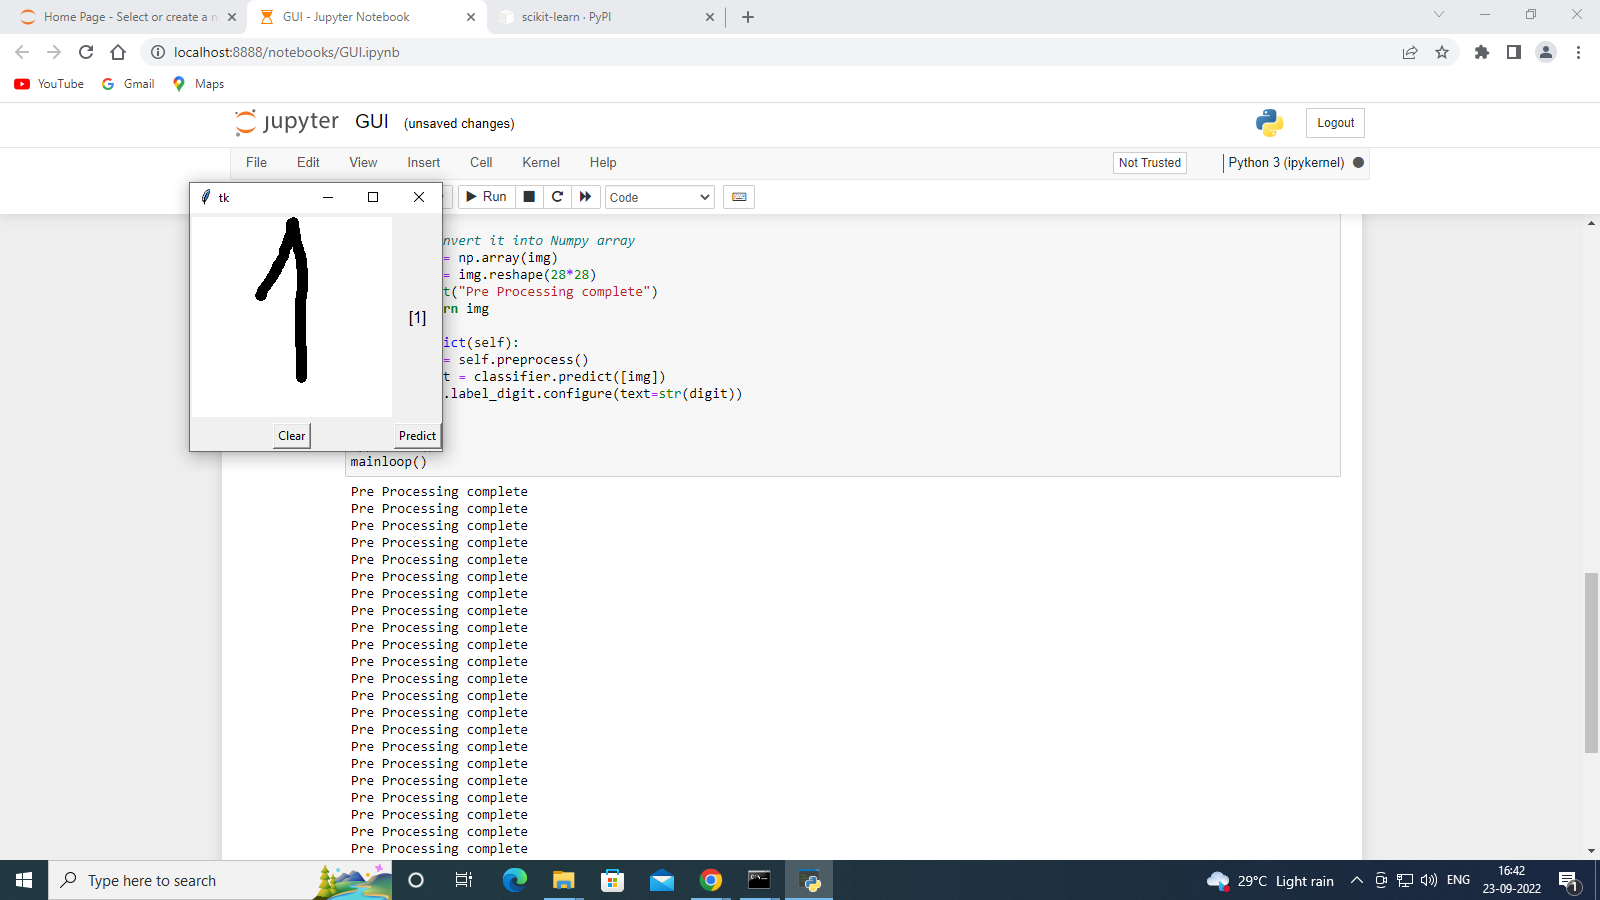

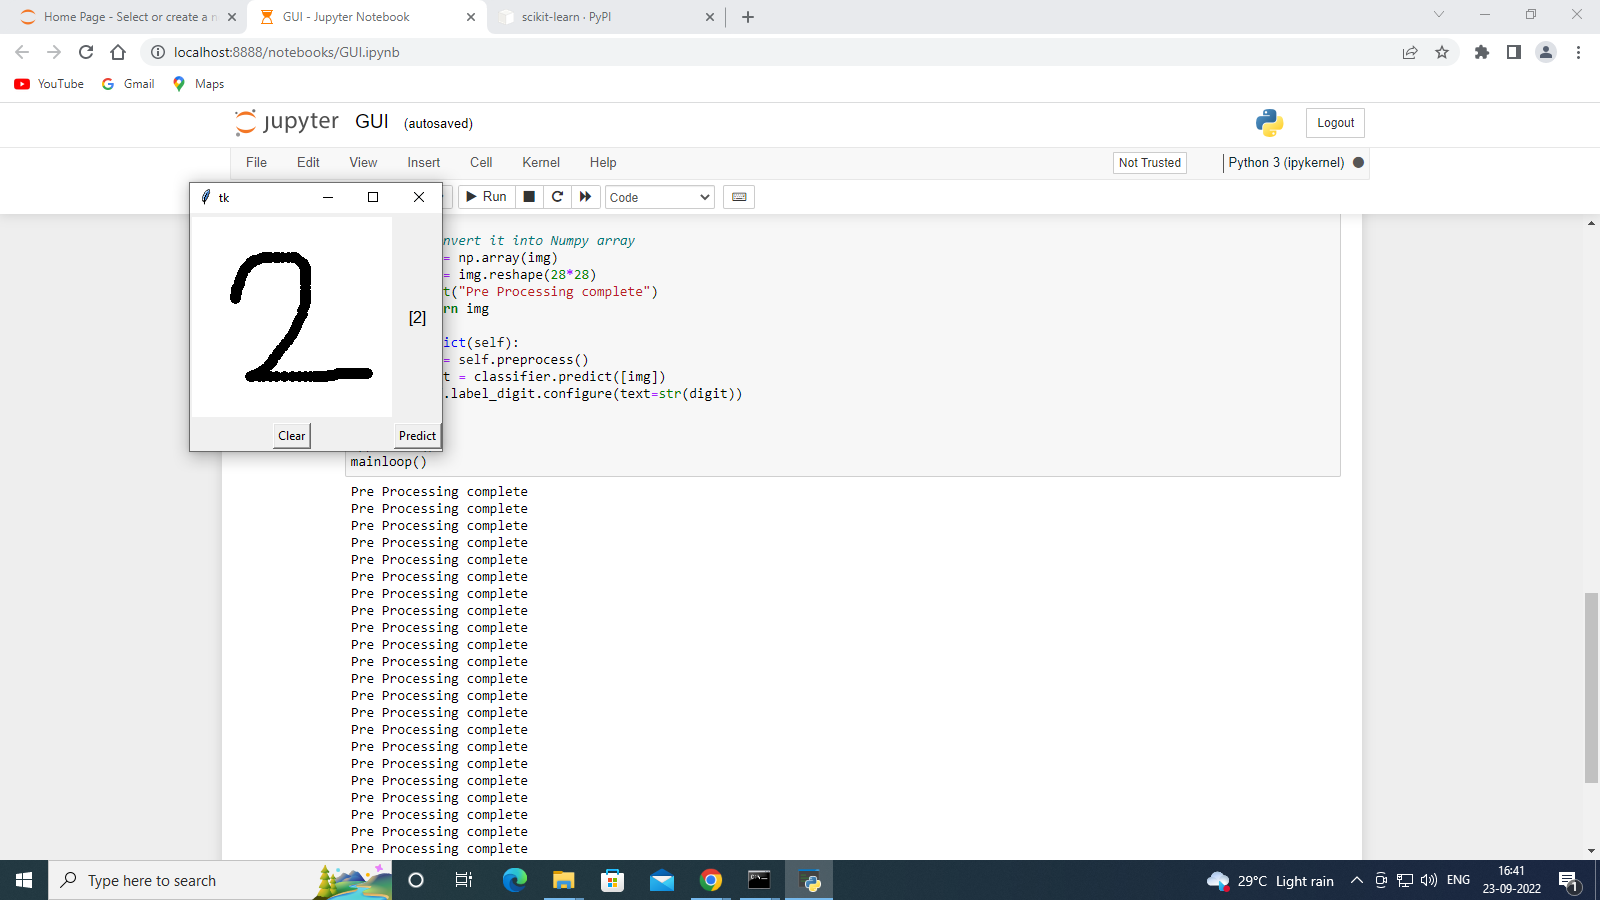

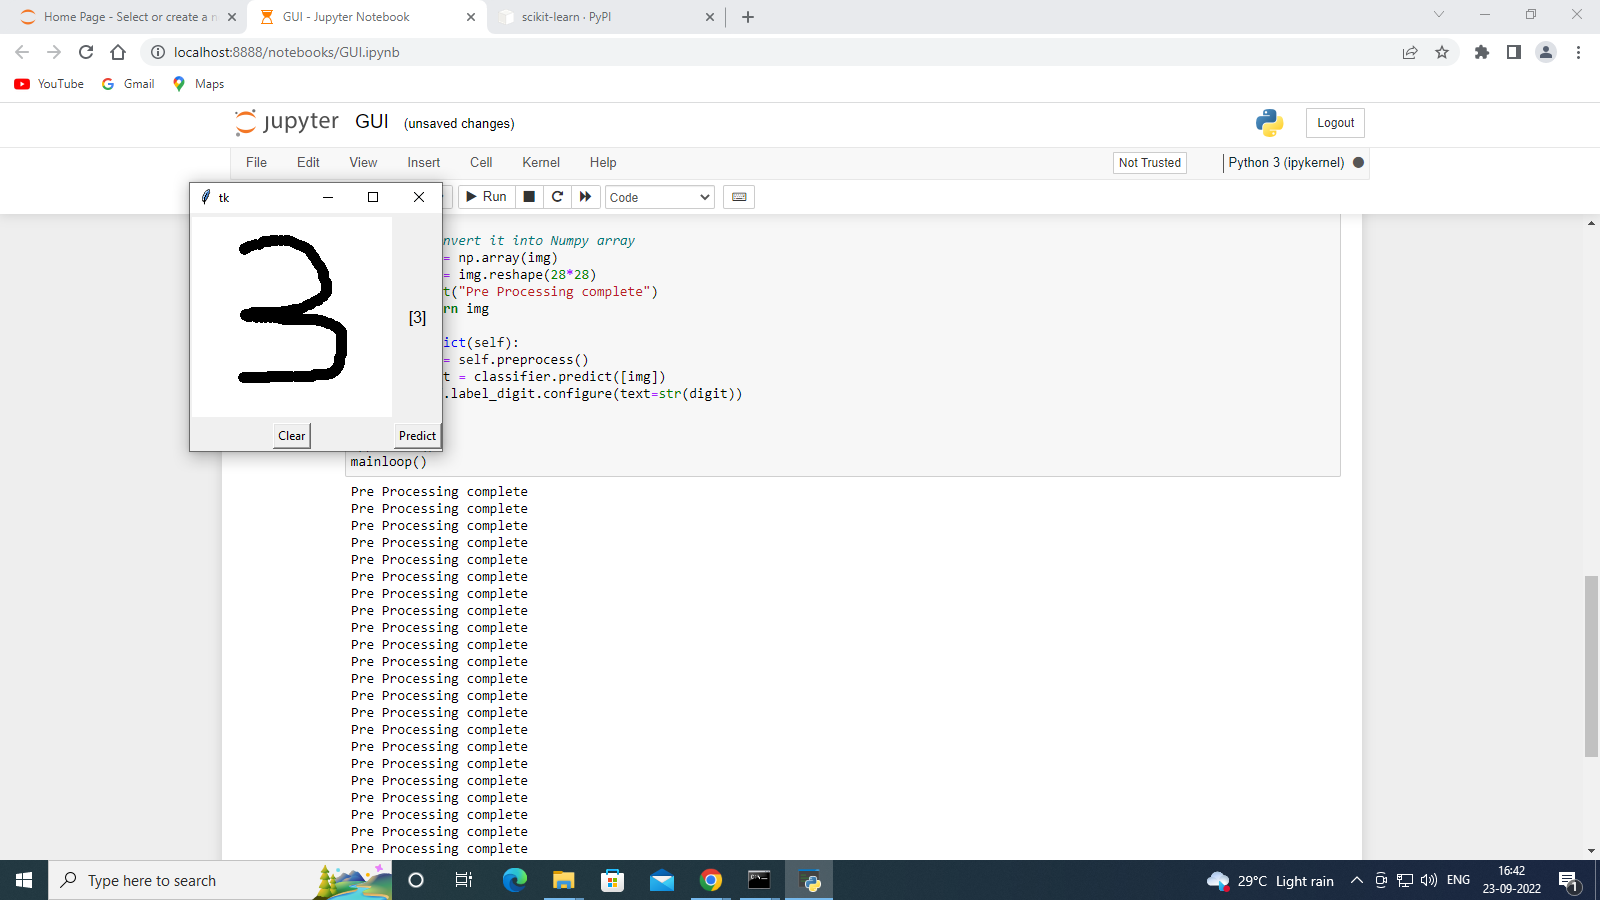

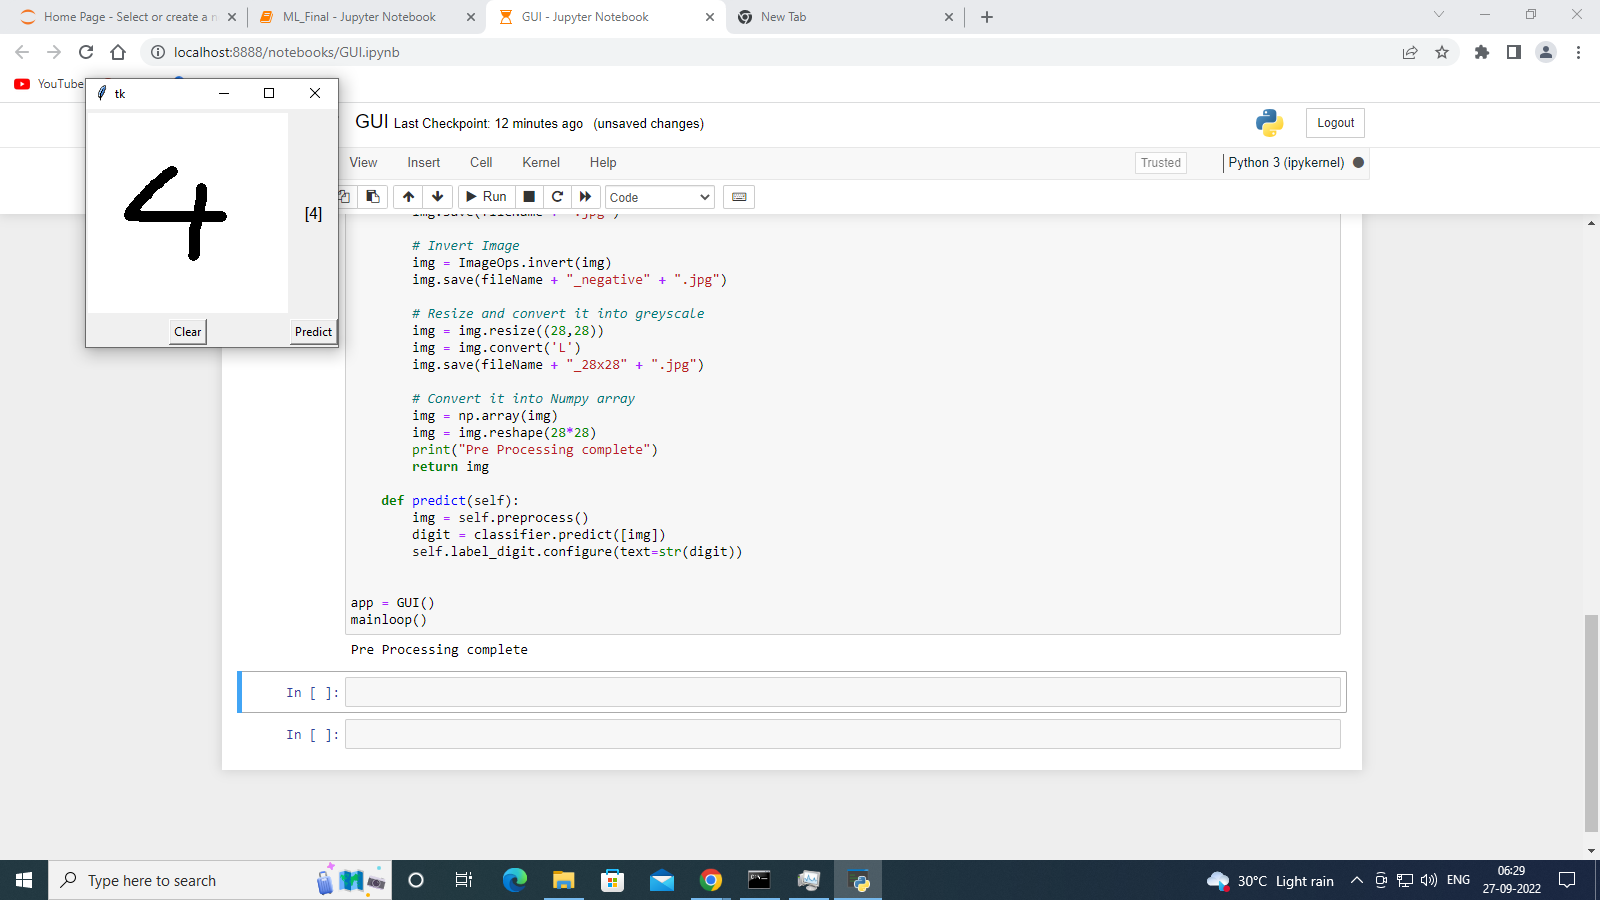

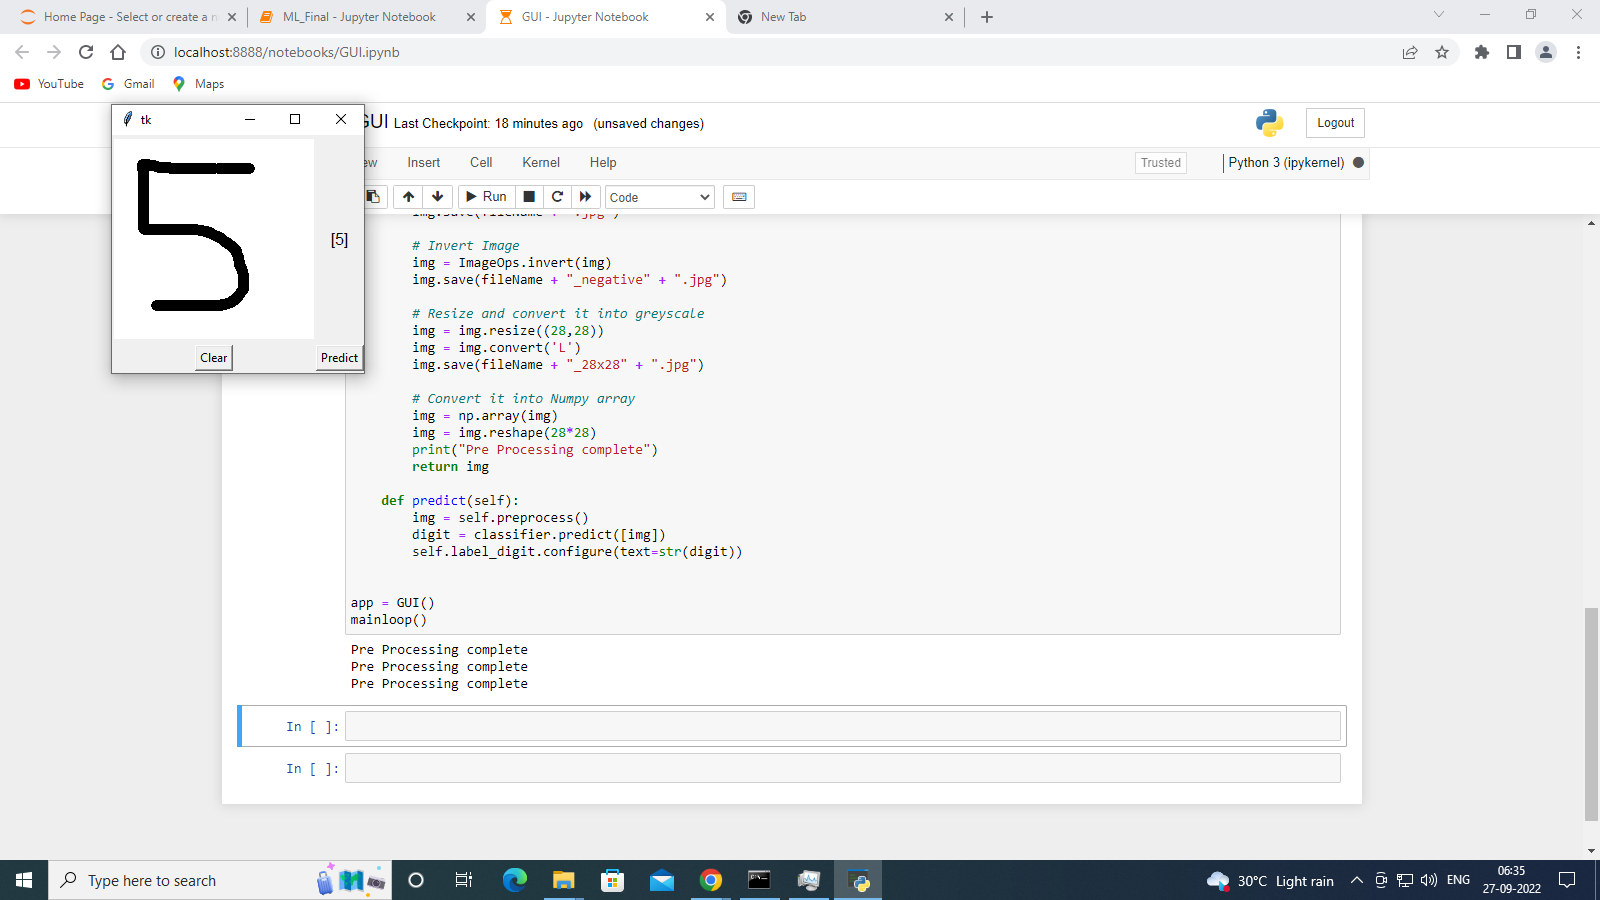

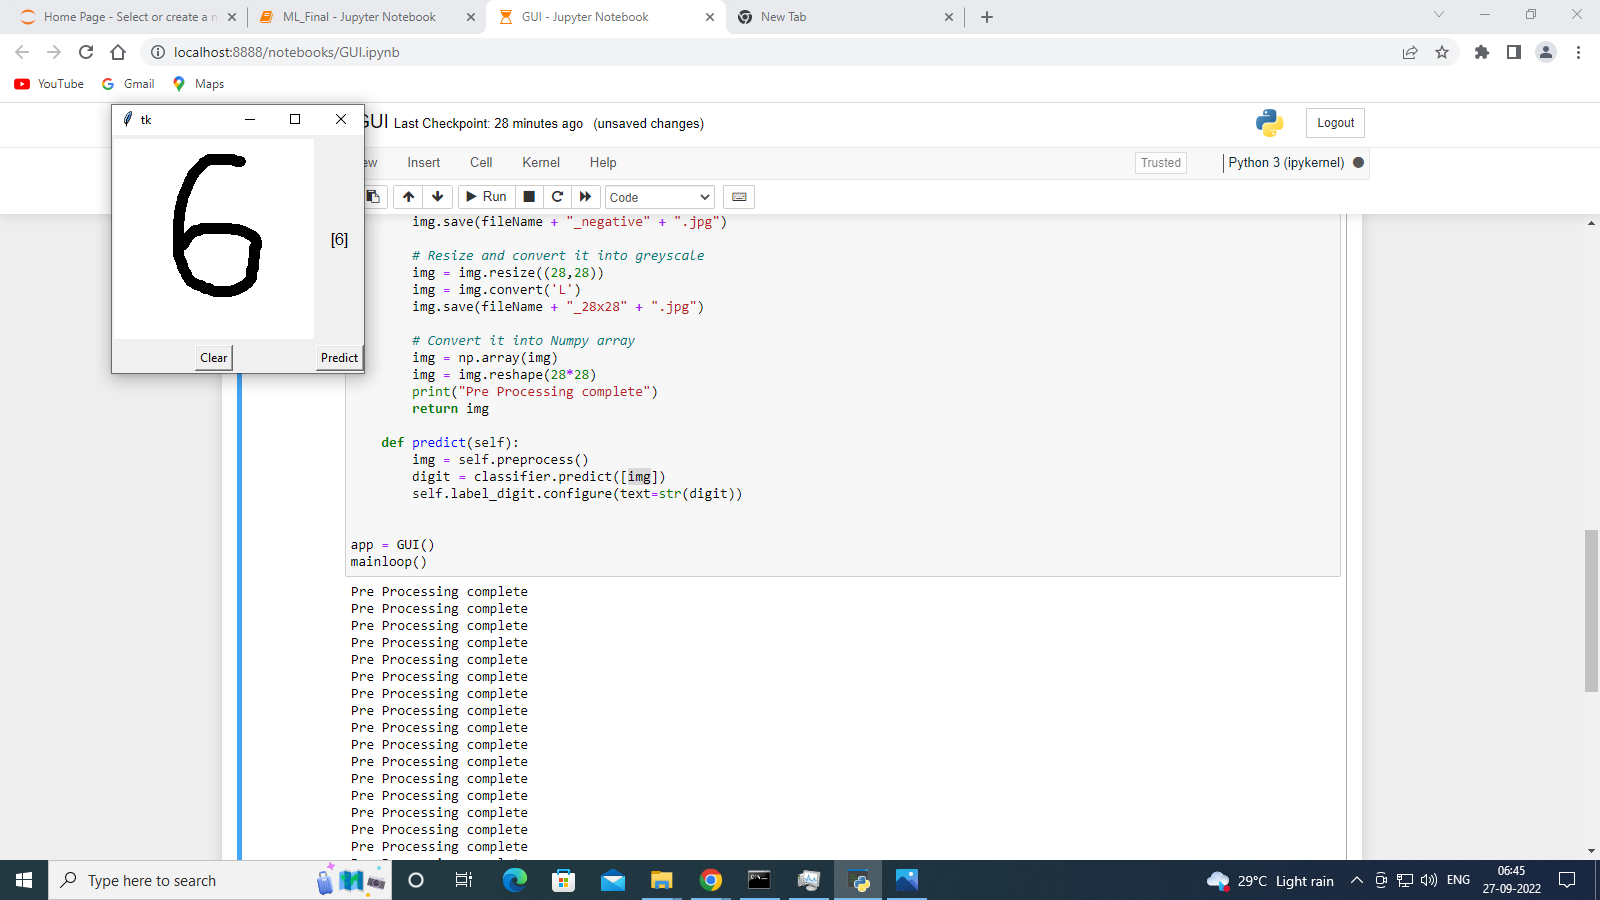

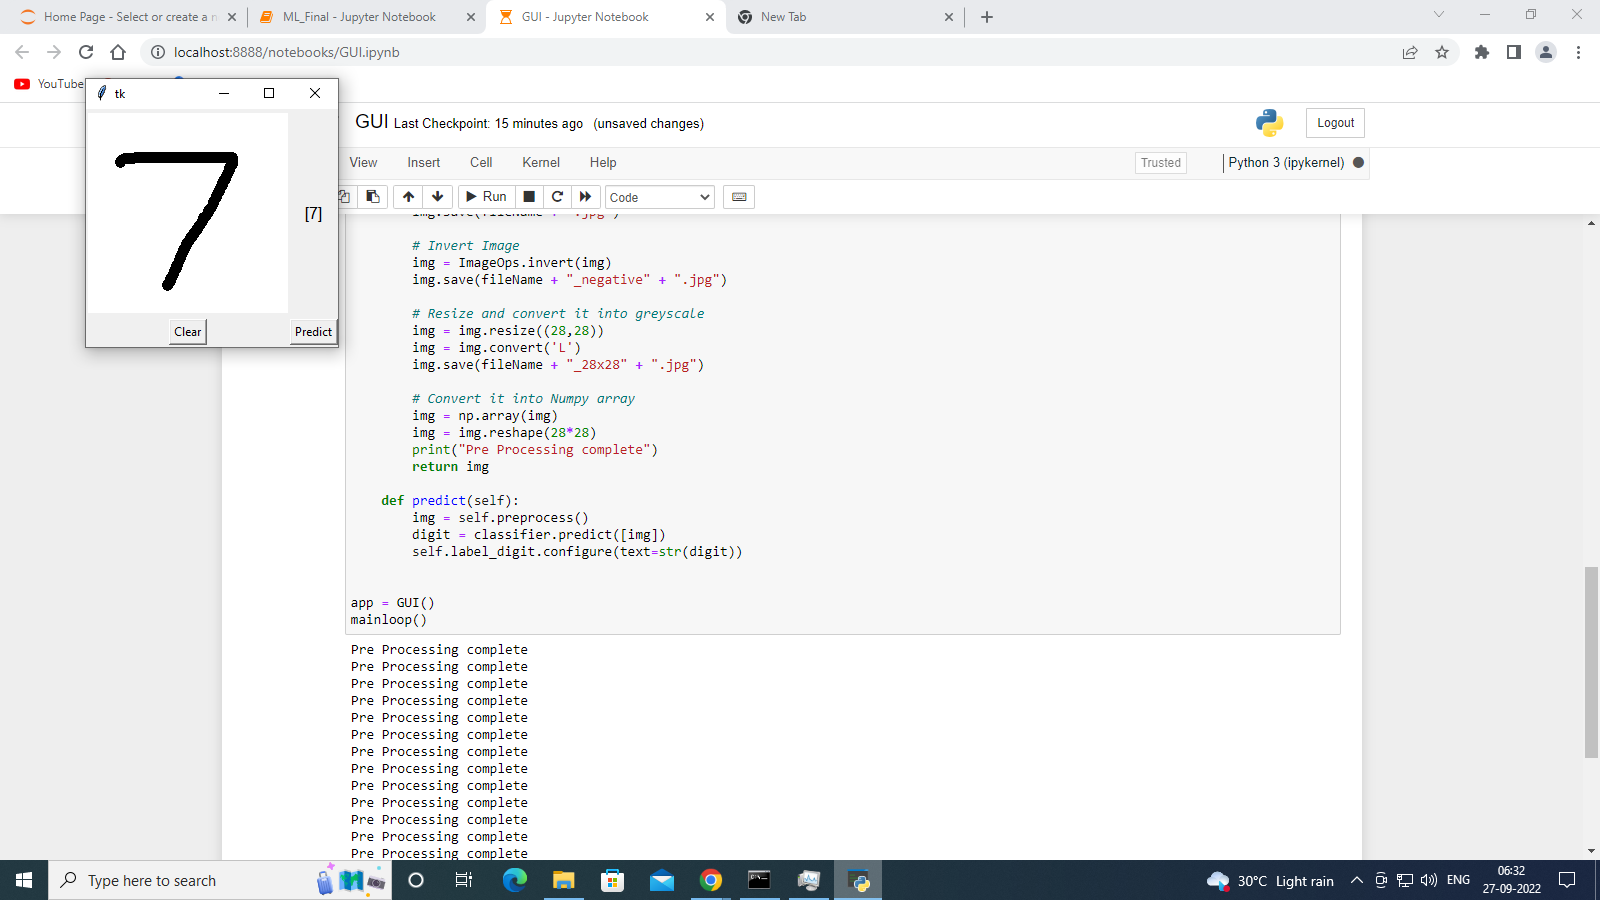

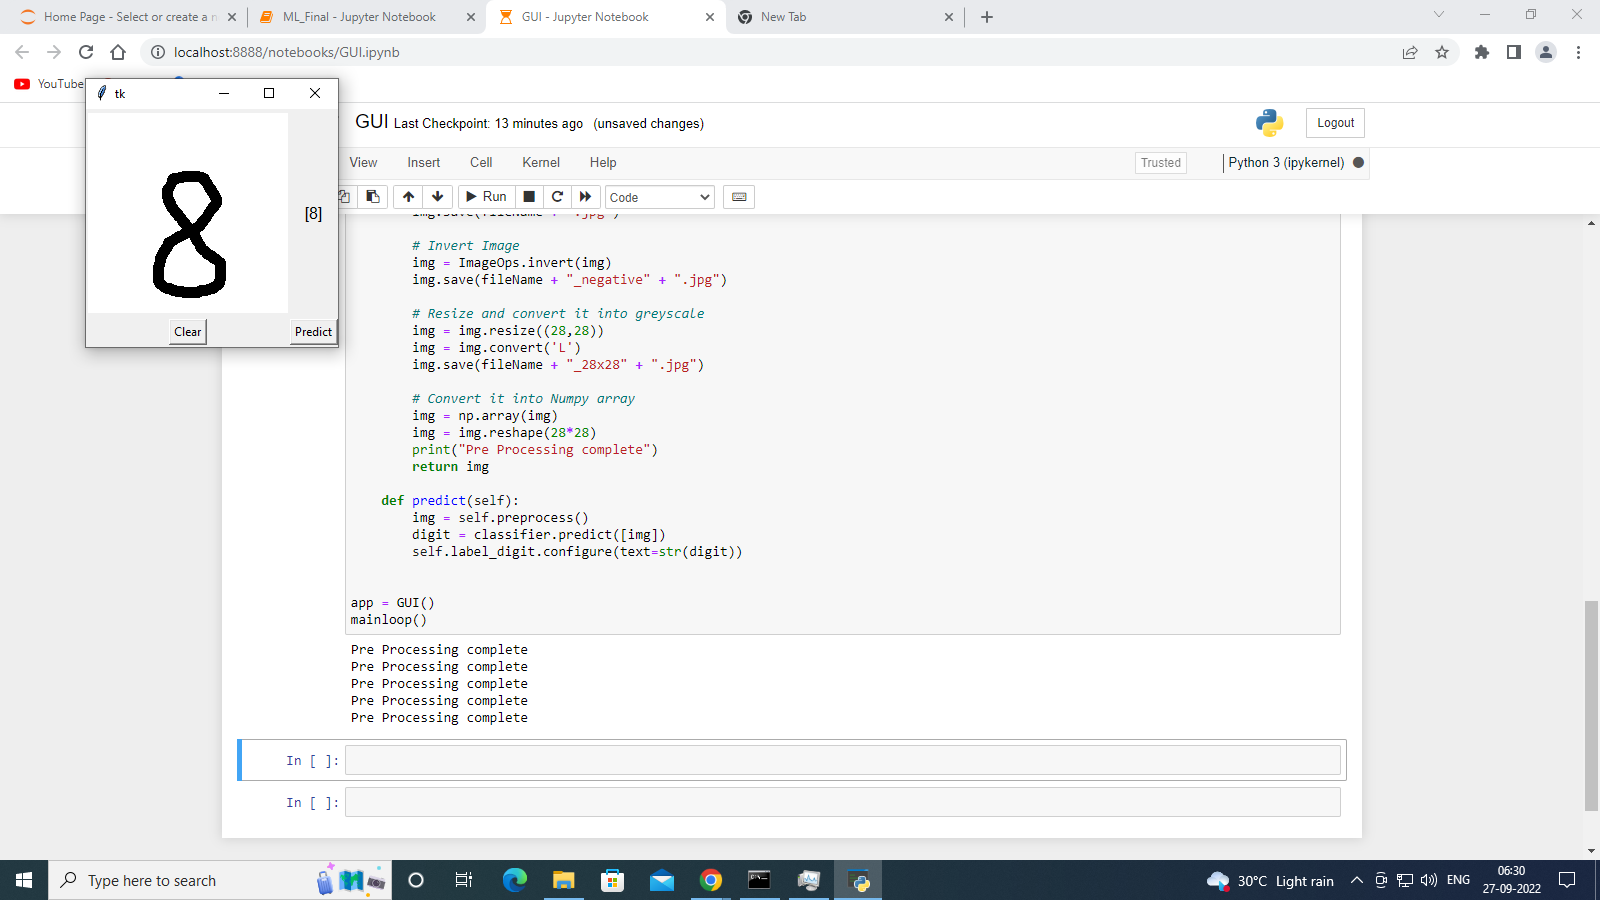

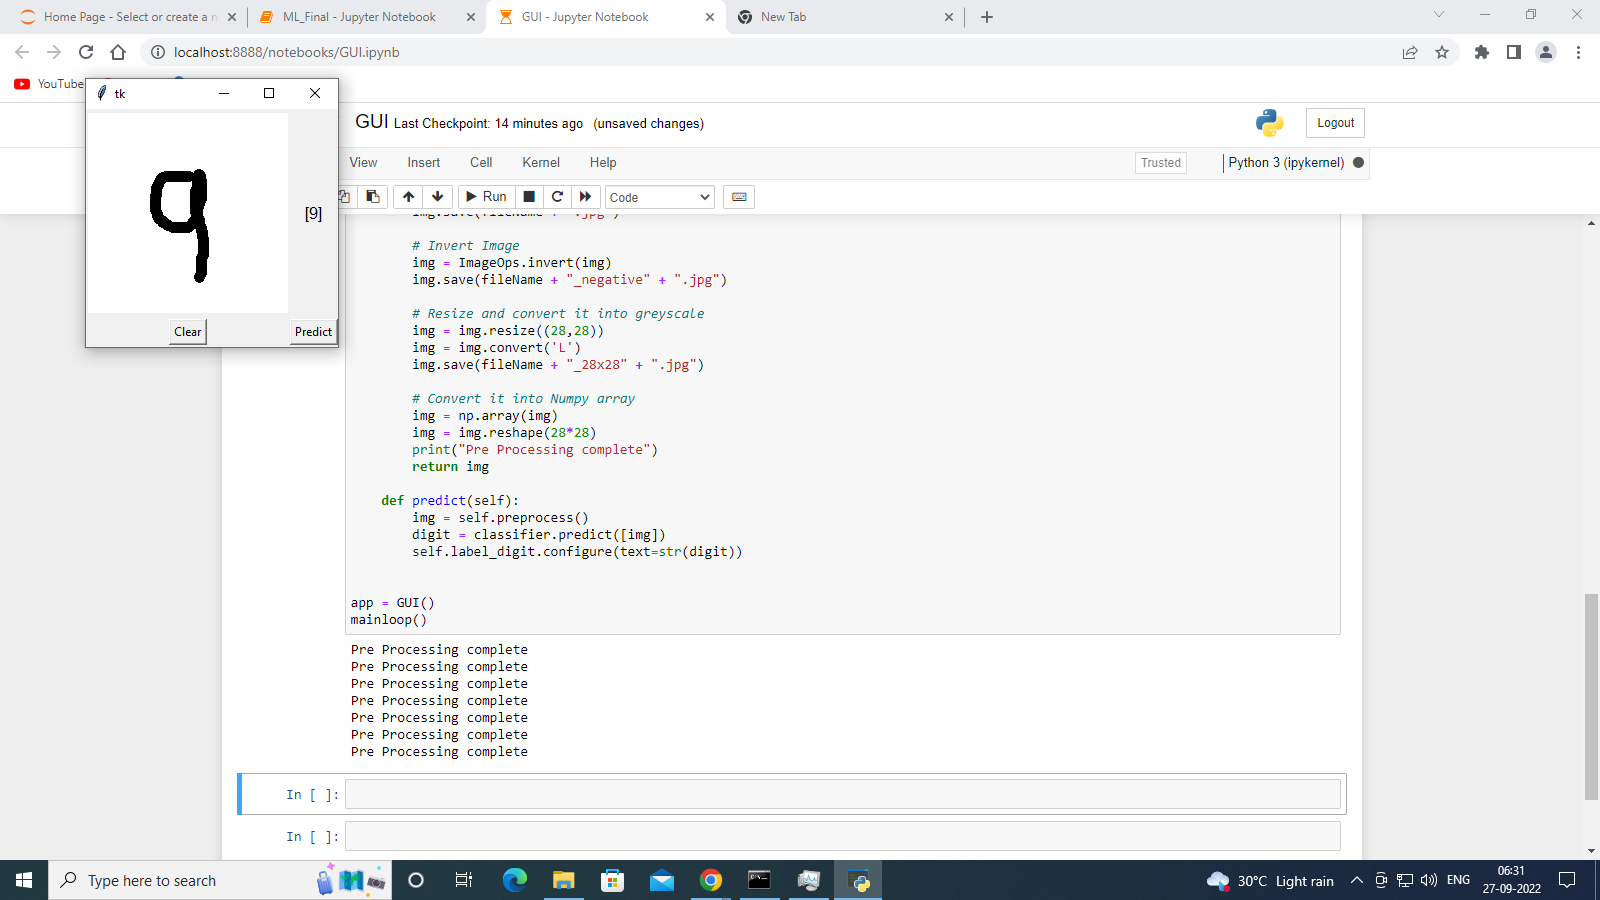